### WeatherPy

### OBS
* * As expected the max temp of the cities raises as the latitude coordinate reach the number 0. It almos seems to be q curve shape , very obvious and impressive overview. 
* * Humidity rises as the coordinates move away from the equator and there seems to be more of a correlation with the amount of clouds present in the cities close to the equator
* * The wind speed seems more moderate on all of the cootdinates, there doesn't seem to be any sort of relation with the latitude

In [200]:
# Dependencies and Setup
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [194]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


640

In [3]:
import csv

with open(output_data_file, mode='w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    filewriter.writerow(['Cities'])
    for Cities in cities:
        filewriter.writerow([Cities])
  


In [6]:
dat_of_cities = pd.read_csv(output_data_file)
type(dat_of_cities)
dat_of_cities.head(2)

,Cities
0,ostrovnoy
1,souillac


## Perform API Calls

In [7]:
api_key = api_keys.api_key

In [8]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
lst_dict  = []
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?q=,units=Imperial&APPID=" + api_key + 
url = "http://api.openweathermap.org/data/2.5/weather"


for city in range(len(dat_of_cities.values)):
    
    names = dat_of_cities.values[city][0].title()
    
    parameters={'q': names, 'units': 'imperial', 'appid' : api_key}
    # Make a get request to get the latest position of the international space station from the opennotify api.
    #response = requests.get(url, params=parameters)
    res = requests.get(url, params=parameters).json()
    #if response.status_code != 200:
     #   raise ApiError('GET /weather/ {}'.format(response.status_code))
       
        #print(dat_of_cities.values[city][0])
        # names are lowercase need to uppercase first letter
    try:
        if names == res['name']:
            lst_dict.append({
                'Cities' : res['name'],
                'Latitude' : res['coord']['lat'],
                'Longitude' : res['coord']['lon'],
                'Temperature' : res['main']['temp'],
                'Humidity (%)' : res['main']['humidity'],
                'Cloudiness (%)' : res['clouds']['all'],
                'Wind Speed (mph)': res['wind']['speed'] 
            })
    except:
        pass



In [9]:
rdata_of_cities = pd.DataFrame(lst_dict)

In [10]:
rdata_of_cities.head(10)

,Cities,Cloudiness (%),Humidity (%),Latitude,Longitude,Temperature,Wind Speed (mph)
0,Ostrovnoy,20,86,68.05,39.51,25.82,14.34
1,Souillac,0,93,45.60,-0.60,37.40,1.12
2,Mahibadhoo,92,100,3.78,72.97,80.63,14.56
3,Atuona,64,100,-9.80,-139.03,79.73,16.02
4,Vaini,0,29,15.34,74.49,88.01,7.74
5,Mahebourg,75,88,-20.41,57.70,77.00,11.41
6,Maldonado,0,82,-34.91,-54.96,62.60,9.17
7,Snasa,75,69,64.25,12.38,33.80,13.87
8,Midland,12,91,32.00,-102.08,64.83,11.41
9,Ushuaia,20,29,-54.81,-68.31,50.00,25.28


In [199]:
lon = rdata_of_cities['Longitude']
lat = rdata_of_cities['Latitude']

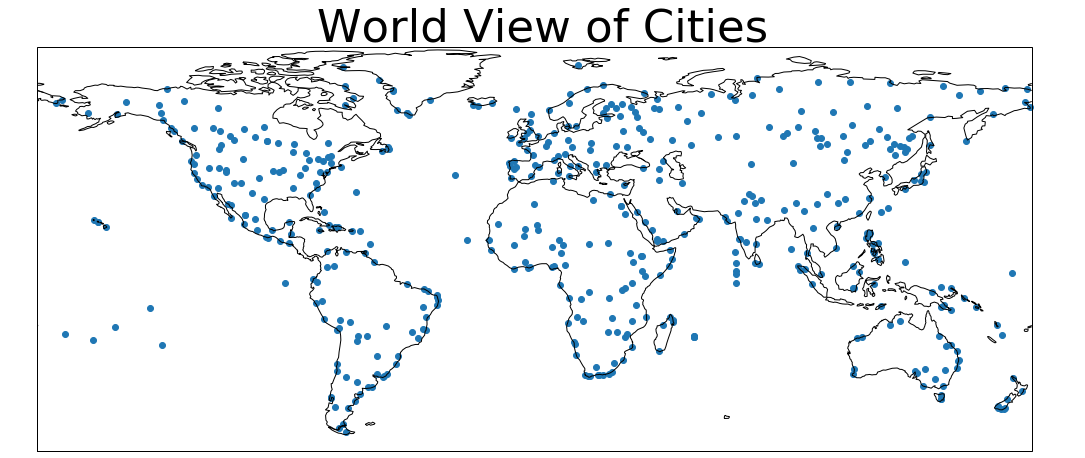

In [167]:
fig = plt.figure(figsize=(19.2, 10.8))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
plt.title('World View of Cities', fontsize=45)
ax.coastlines()

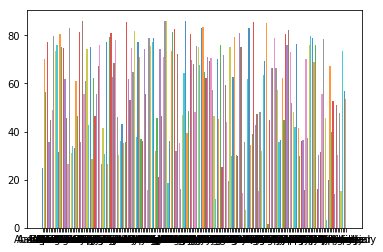

In [192]:
for city, data in rdata_of_cities.groupby('Cities'):
 
    
    humid = data.groupby(['Latitude','Longitude','Cities']).sum()
    if humid['Humidity (%)'].item() >= 90:
        #print(type(humid['Humidity (%)']))
        high = list(humid.Temperature)
        #print(high)
       # x = high.plot(figsize = (16, 10))
        #print(each[2] for each in idx)    
        idx = list(humid.index)
        la = [each[0] for each in idx]
        lo = [each[1] for each in idx]
        plt.bar(city, high, alpha=0.8)
    

In [99]:
#type(rdata_of_cities['Latitude'])

pandas.core.series.Series

In [173]:
#tem_d.values

In [176]:
#tem_d = rdata_of_cities[rdata_of_cities['Temperature']<= 50]

In [165]:
data.groupby(['Latitude','Longitude','Cities']).sum()

,,,Cloudiness (%),Humidity (%),Temperature,Wind Speed (mph)
Latitude,Longitude,Cities,,,,
48.35,33.5,Zhovti Vody,90,100,53.6,4.47


In [174]:
data.groupby(['Latitude','Longitude']).sum()

,,Cloudiness (%),Humidity (%),Temperature,Wind Speed (mph)
Latitude,Longitude,,,,
3.98,13.18,68,98,68.84,2.93


In [184]:
humid['Humidity (%)'].item() >= 60

True

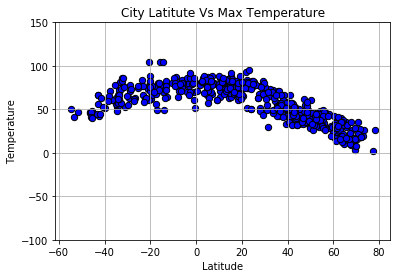

In [198]:
rdata_of_cities.plot.scatter('Latitude', 'Temperature'
                             , title='City Latitute Vs Max Temperature', s=40,
                            ylim=[-100,150],
                            color='Blue',
                            edgecolor='Black',
                            grid=True)

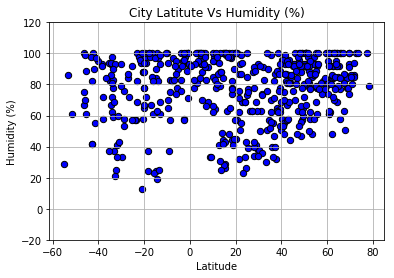

In [197]:
rdata_of_cities.plot.scatter('Latitude', 'Humidity (%)'
                             , title='City Latitute Vs Humidity (%)', s=40,
                            ylim=[-20,120],
                            color='Blue',
                            edgecolor='Black',
                            grid=True)

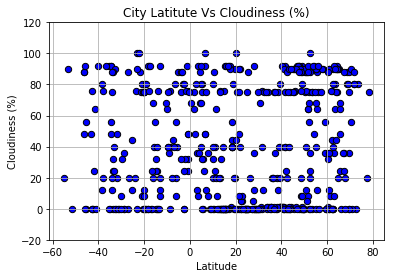

In [196]:
rdata_of_cities.plot.scatter('Latitude', 'Cloudiness (%)'
                             , title='City Latitute Vs Cloudiness (%)', s=40,
                            ylim=[-20,120],
                            color='Blue',
                            edgecolor='Black',
                            grid=True)

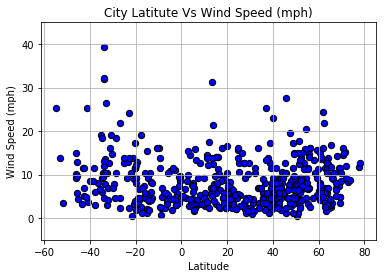

In [195]:
rdata_of_cities.plot.scatter('Latitude', 'Wind Speed (mph)'
                             , title='City Latitute Vs Wind Speed (mph)', s=40,
                            ylim=[-5,45],
                            color='Blue',
                            edgecolor='Black',
                            grid=True)